In [1]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Embedding,LSTM,SpatialDropout1D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PARCHU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PARCHU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
data=pd.read_csv("C:/Users/PARCHU/Downloads/IMDB_REVIEW/IMDB Dataset.CSV")

In [7]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [8]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [10]:
def cleaning(df,stop_words):
    
    df['review']=df['review'].apply(lambda x:' '.join(x.lower() for x in x.split())) 

    df['review'] = df['review' ].str.replace('[^ws]', '')

    df['review'] = df['review'].str.replace('d', '')

    df['review'] = df['review'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))

    df['review'] = df['review'].apply(lambda x:  ' '.join([Word(x).lemmatize() for x in x.split()]))

    return df

stop_words = stopwords.words('english')
data= cleaning(data, stop_words)



C:\Users\PARCHU\AppData\Local\Temp/ipykernel_632/3355855682.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review' ].str.replace('[^ws]', '')


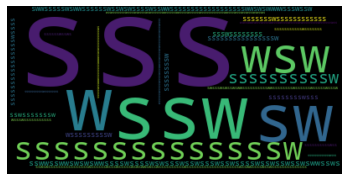

In [11]:
common_words=''
for i in data.review:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
lb=LabelEncoder()
data['sentiment'] = lb.fit_transform(data['sentiment'])

In [13]:
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(data['review'].values)
X = tokenizer.texts_to_sequences(data['review'].values)
X = pad_sequences(X)

In [14]:
model=Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 120)            60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 1, 120)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
y=pd.get_dummies(data['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [16]:
model.fit(X_train, y_train, epochs = 5, batch_size=45, verbose = 'auto')
 

Epoch 1/5
778/778 [==============================] - 14s 9ms/step - loss: 0.6933 - accuracy: 0.5041
Epoch 2/5
778/778 [==============================] - 7s 10ms/step - loss: 0.6916 - accuracy: 0.5084
Epoch 3/5
778/778 [==============================] - 7s 9ms/step - loss: 0.6863 - accuracy: 0.5090
Epoch 4/5
778/778 [==============================] - 7s 9ms/step - loss: 0.6829 - accuracy: 0.5086
Epoch 5/5
778/778 [==============================] - 7s 9ms/step - loss: 0.6814 - accuracy: 0.5103


In [17]:
model.evaluate(X_test,y_test)

469/469 [==============================] - 2s 3ms/step - loss: 0.6910 - accuracy: 0.5047


[0.6910126209259033, 0.5046666860580444]